In [80]:
from utils.hive_access import *
from pyhive import hive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import defaultdict

In [2]:
df_arquivo = pd.read_csv('../dados/dataset_item.csv', sep=';')
print('arquivo', df_arquivo.shape[0])
df_arquivo.head()

arquivo 7549433


,seq_dim_licitacao,seq_dim_item,vlr_quantidade,vlr_unitario_homologado,num_exercicio,nom_entidade,nom_item,dsc_unidade_medida,nom_item_busca,vlr_licitacao,cod_modalidade,areas,seq_licitacao_item
0,714472,11777634,15000.0,3.49,2015,Belo Oriente,GASOLINA COMUM,LITRO,GASOLINA COMUM,56410.0000,5,Legislativa,1
1,714472,11777639,1000.0,2.35,2015,Belo Oriente,ETANOL,LITRO,ETANOL,56410.0000,5,Legislativa,2
2,714472,11777644,30.0,14.00,2015,Belo Oriente,OLEO PARA MOTOR 20 W50-M.GASOL,LITRO,OLEO PARA MOTOR 20 W50-M.GASOL,56410.0000,5,Legislativa,3
3,714472,11777672,30.0,43.00,2015,Belo Oriente,OLEO SINTETICO PARA MOTOR,LITRO,OLEO SINTETICO PARA MOTOR,56410.0000,5,Legislativa,4
4,714473,11777385,5.0,56.56,2015,Belo Oriente,PERFURADOR DE PAPEL,UNIDADE,PERFURADOR DE PAPEL,9988.9633,1,Legislativa,5


In [8]:
conn = hive.Connection(host='hadoopmn-gsi-prod03.mpmg.mp.br', port=10000, 
username='trilhasgsi', password='UFMGtrilhas2020', database='default', auth='CUSTOM')

In [9]:

df = pd.read_sql("SELECT count(1) FROM trilhas.f03_dataset_item_licitacao", conn)
print('tabela', df._c0.values[0])


tabela 7549433


In [3]:
def quantidade_unidade_medida_diferentes(df):
    return len(df['dsc_unidade_medida'].unique())

In [ ]:
for d in df['dsc_unidade_medida']:
    print(d)

In [4]:
def quantidade_itens_sem_unidade(un_medida):
    if (un_medida == None) or (len(str(un_medida).strip()) == 0):
        return 1
    else:
        return 0

In [5]:
def quantidade_unidades_apenas_numeros(un_medida):
    if str(un_medida).isnumeric():
        return 1
    else:
        return 0

In [6]:
def quantos_tem_numero(un_medida):
    tokens = str(un_medida).split(' ')
    for token in tokens :
        if token.isnumeric():
            return 1
    else:
        return 0

In [87]:
def desc_completa_freq(desc_freq, un_medida):
    desc_freq[un_medida] += 1

In [88]:
def tokens_freq(tokens_freq, un_medida):
    tokens = str(un_medida).split(' ')
    for token in tokens:
        tokens_freq[token] += 1

In [95]:
def word_cloud(frequencies, title):
    wordcloud = WordCloud(collocations=False, width=1600, height=800).generate_from_frequencies(frequencies)
    fig, ax = plt.subplots(figsize=(16,8))            
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)
    plt.title(title)
    return wordcloud

Hive+Postgress 0.0 %
Hive+Postgress 1.3246027880504405 %
Hive+Postgress 2.649205576100881 %
Hive+Postgress quantidade unidade medida diferentes 8696
Hive+Postgress quantidade itens sem unidade 0
Hive+Postgress quantidade unidades apenas numeros 56
Hive+Postgress quantos tem numero 525


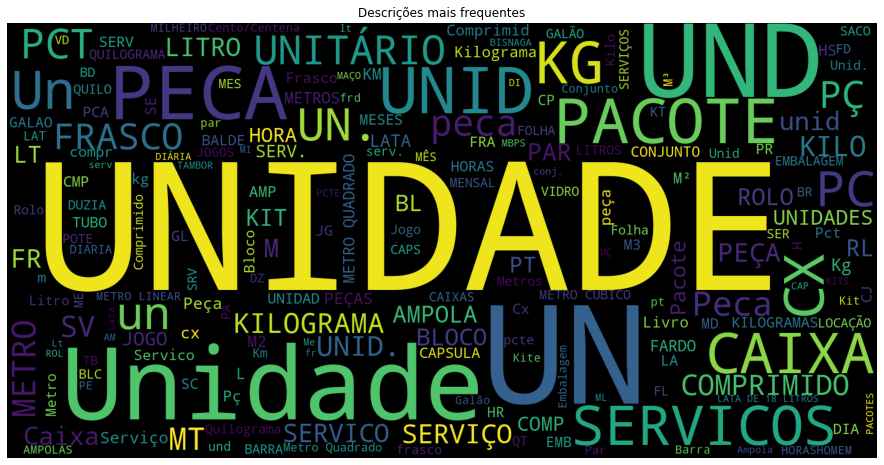

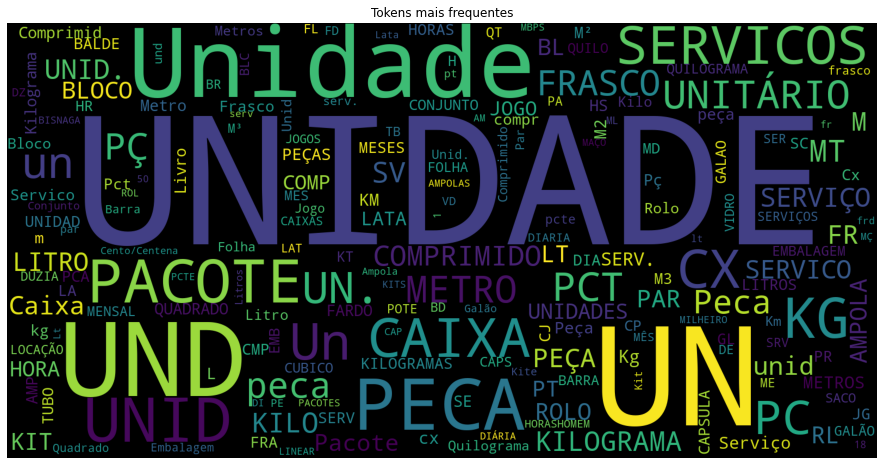

In [96]:
data_frames=[df_arquivo]
titles=['Hive+Postgress']

for title, df in zip(titles, data_frames):
    unidade_medida_diferentes = quantidade_unidade_medida_diferentes(df)
    itens_sem_unidade = 0
    itens_apenas_numeros = 0
    tem_numero = 0
    frequencia_tokens = defaultdict(int)
    frequencia_desc = defaultdict(int)

    cont=0
    size = df.shape[0]
    for idx, values in df.iterrows():

        ##Exibir progresso
        if (cont % 100000) == 0:
            print(title, (cont/size)*100, '%')
        cont+=1
        ##


        un_medida = values['dsc_unidade_medida']
        itens_sem_unidade += quantidade_itens_sem_unidade(un_medida)
        itens_apenas_numeros += quantidade_unidades_apenas_numeros(un_medida)
        tem_numero += quantos_tem_numero(un_medida)
        desc_completa_freq(frequencia_desc, un_medida)
        tokens_freq(frequencia_tokens, un_medida)
        ##Terminar depois de uma amostra, para testar
        if (cont == 300000):
            break
        ##
    print(title, 'quantidade unidade medida diferentes', unidade_medida_diferentes)
    print(title, 'quantidade itens sem unidade', itens_sem_unidade)
    print(title, 'quantidade unidades apenas numeros', itens_apenas_numeros)
    print(title, 'quantos tem numero', tem_numero)
    
    desc_word_cloud = word_cloud(frequencia_desc, 'Descrições mais frequentes')
    tokens_word_cloud = word_cloud(frequencia_tokens, 'Tokens mais frequentes')